## Importing Libraries

In [472]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, log_loss

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

%matplotlib inline

# set the column with
pd.set_option('max_columns', 21)

## Loading the data

The dataset we will be using is Gender Recognition by Voice and Speech Analysis

More about database -> https://www.kaggle.com/primaryobjects/voicegender

In [27]:
# load the data
voice_df = pd.read_csv(r"C:\Users\Benai\Documents\machin-learning\svm\voice.csv")

In [28]:
# print the shape of the data
voice_df.shape

(3168, 21)

In [29]:
# print the first five row of the dataset
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Preprocessing

### Exploratory Data Analysis

In [31]:
# checking if there is any missing values
voice_df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [107]:
# get the brief information about dataset
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int3

In [108]:
# get the aggregation
voice_df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


In [37]:
# cheking th correlation

voice_df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


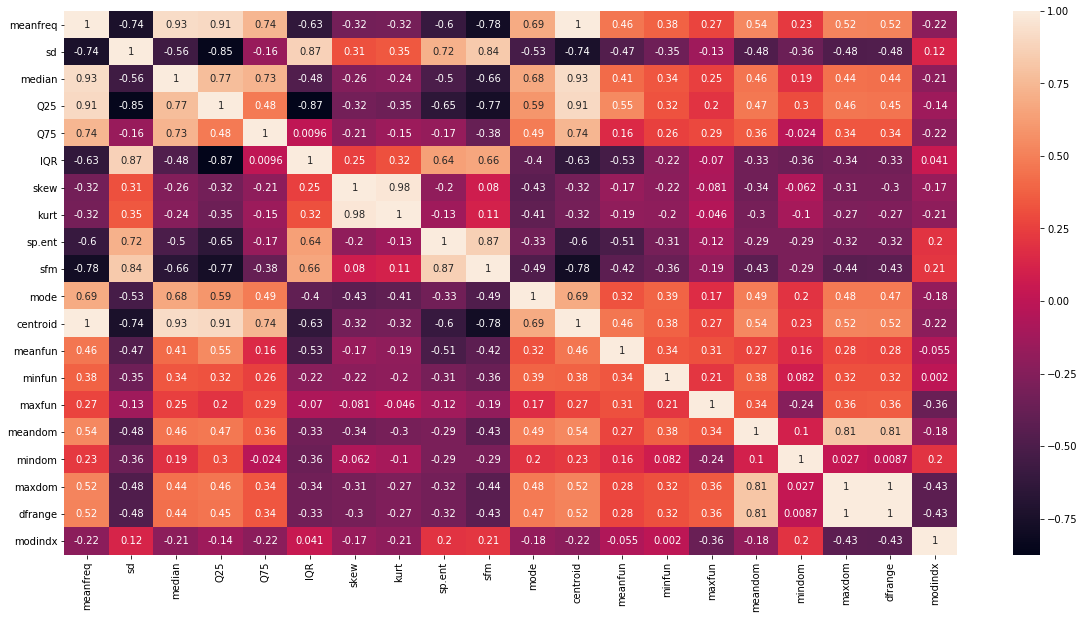

In [43]:
# visualizing the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(voice_df.corr(), annot=True,)
plt.show()

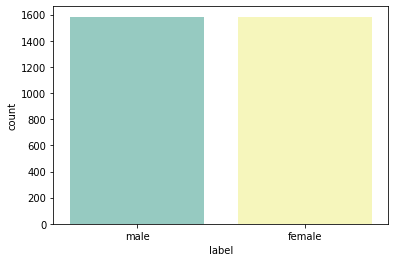

In [78]:
# checking the no of male and female voice (output column)
sns.countplot(voice_df['label'], data=voice_df, palette='Set3')

In [103]:
# Making categorical variables into numeric representation

label_encode = LabelEncoder()
voice_df['label'] = label_encode.fit_transform(voice_df['label'])

In [106]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


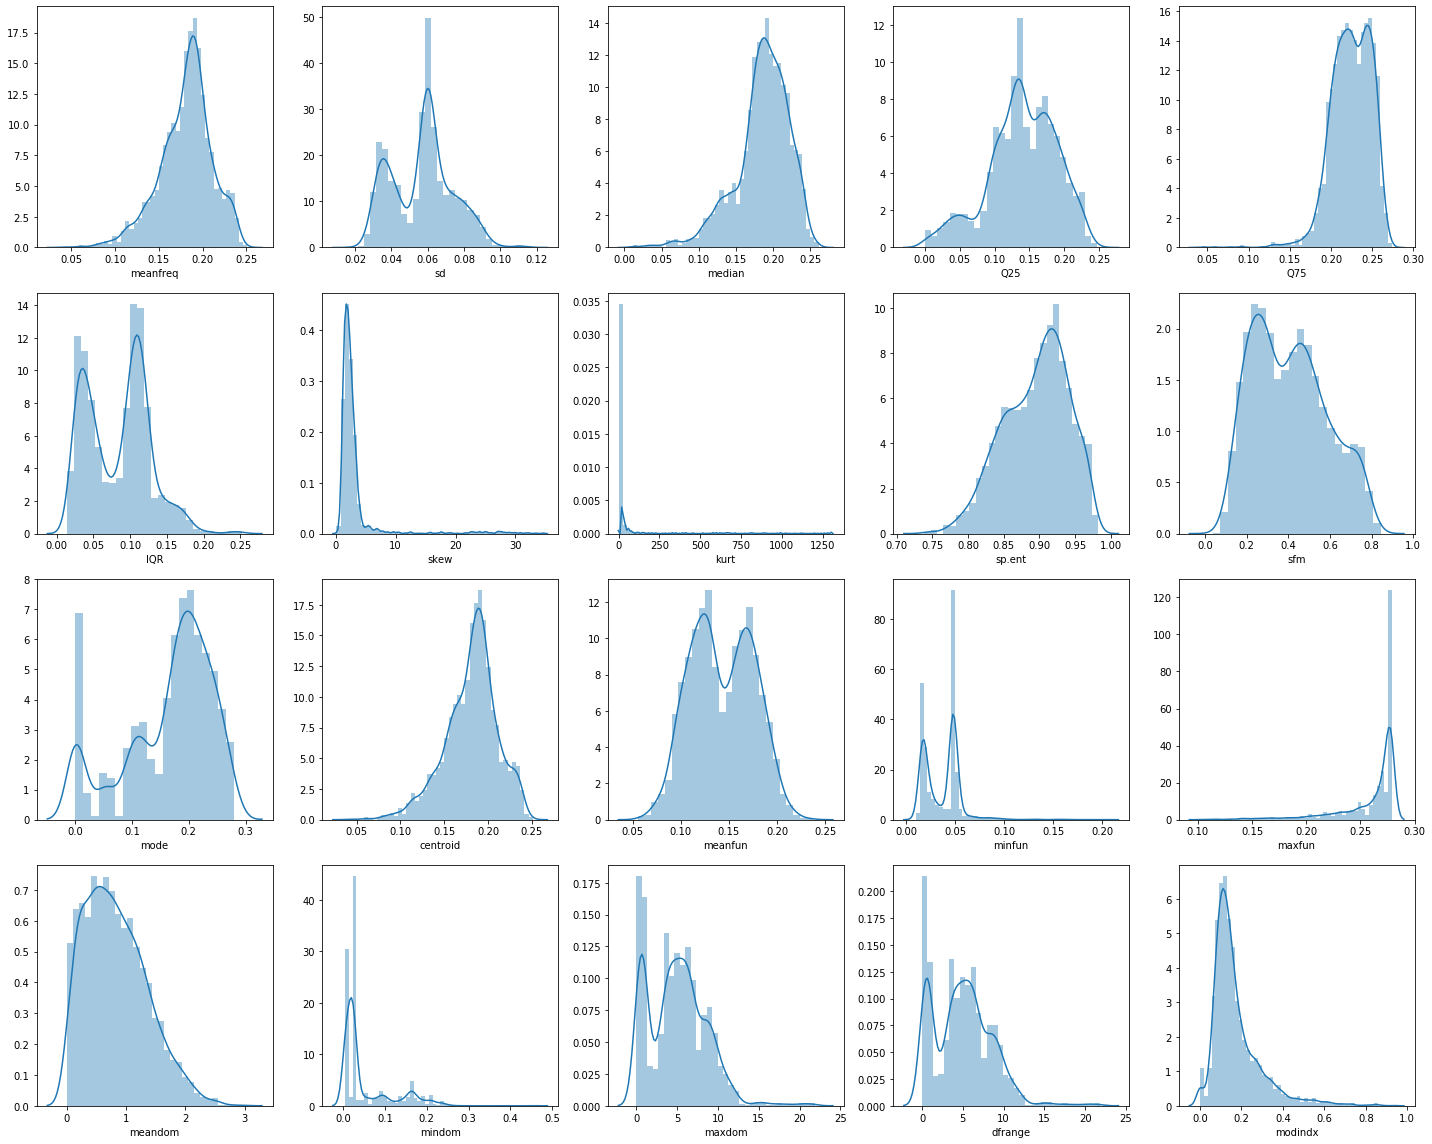

In [182]:
# chek the distribution of the data
def dist_plot(df):
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
    for i,cols in enumerate(voice_df.columns[0:-1]):
        sns.distplot(df[cols], ax=ax[i//5, i%5])
        plt.tight_layout()
        
dist_plot(voice_df)

## Split the data

In [149]:
# independent variables
x = voice_df.drop('label', axis=1)

# dependent variable
y = voice_df['label']

### Feature Scaling (Standardization)

In [150]:
# initalize the StandardScaler
data_scale = StandardScaler()

# fit the data to scale
x = data_scale.fit_transform(x)

In [179]:
# covert it into data frame after scaling
df = pd.DataFrame(data = x, columns=voice_df.columns[0:-1])

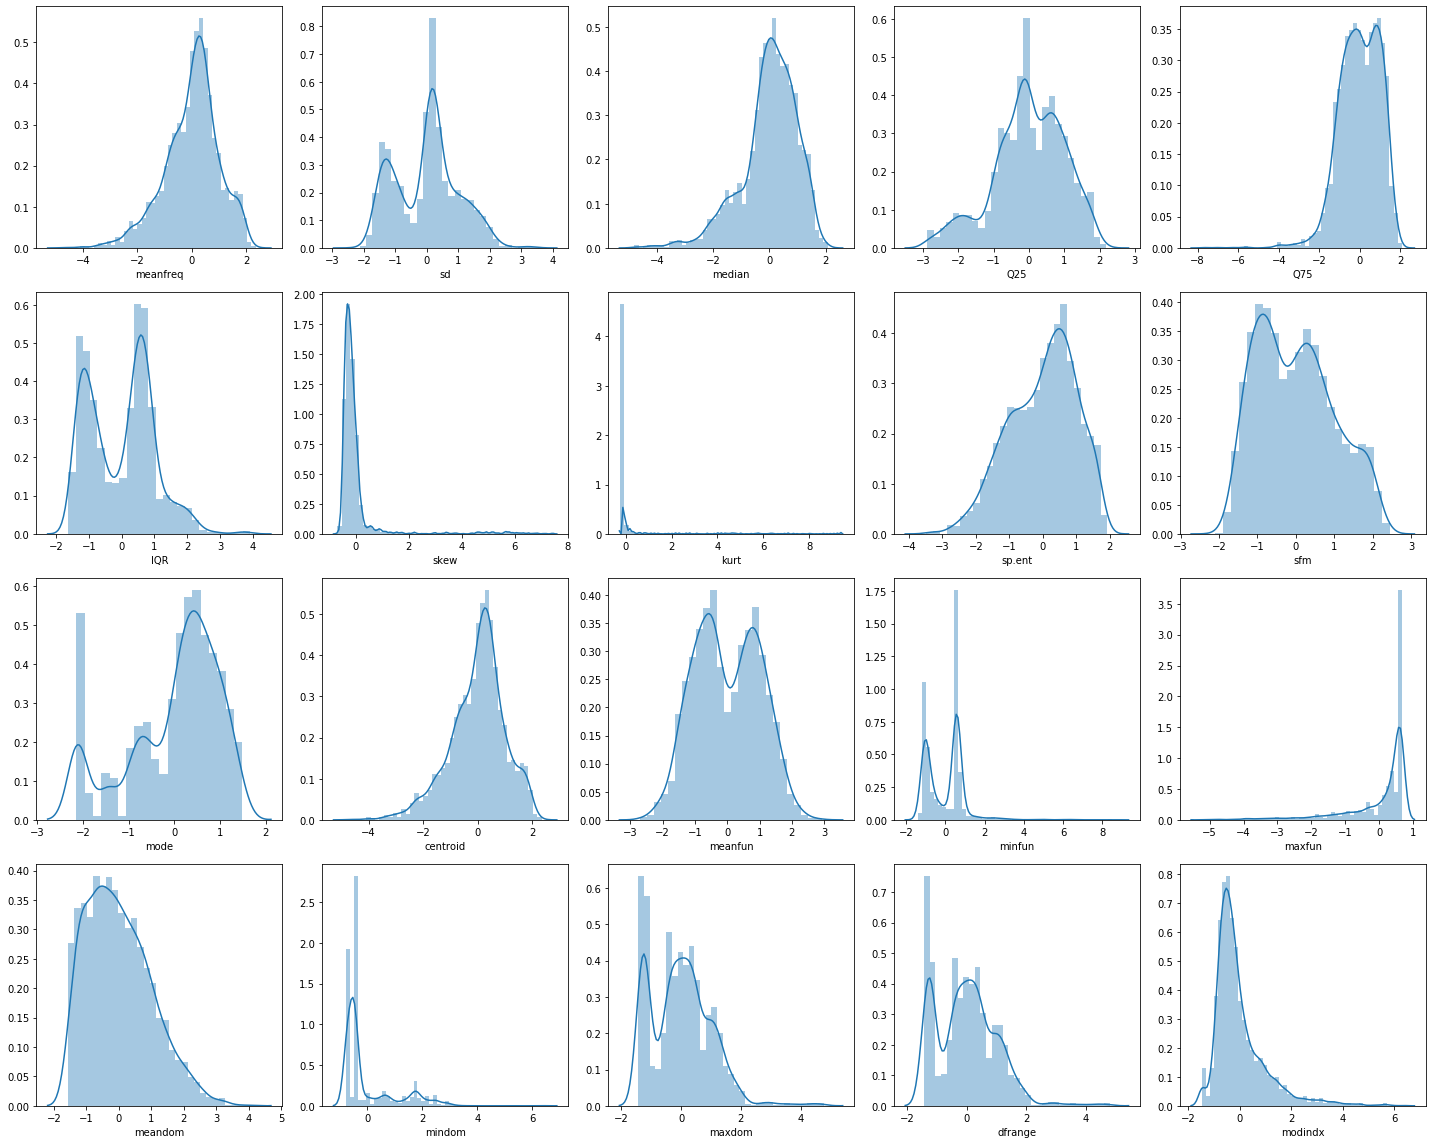

In [184]:
# visualizing after scaling
dist_plot(df)

## Cross validation 

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.20, random_state=42)

## Running SVM with default hyperparameter

In [443]:
# initializing object
svc = SVC(probability=True, verbose=True)

# fit the training data
svc.fit(x_train, y_train)

# preidct with the test data
y_predict_train = svc.predict(x_train)
y_predict = svc.predict(x_test)

[LibSVM]

In [444]:
# probability estimator
pred_proba = svc.predict_proba(x_test)
print(pred_proba)

# print intercept
svc.intercept_

[[9.96972949e-01 3.02705147e-03]
 [4.52010011e-03 9.95479900e-01]
 [6.21335660e-03 9.93786643e-01]
 ...
 [5.98604684e-01 4.01395316e-01]
 [8.52531742e-03 9.91474683e-01]
 [9.99768836e-01 2.31163927e-04]]


array([-0.05684709])

## Evaluating the Model

In [474]:
# Accuracy on Train
print("The Training Accuracy is: ", accuracy_score(y_train, y_predict_train))

# Accuracy on Test
print("The Testing Accuracy is: ", accuracy_score(y_test, y_predict))

# classification report
print('\nclassification report:\n', classification_report(y_test, y_predict))

# Log loss
print('\n Log loss', log_loss(y_test, pred_proba))

The Training Accuracy is:  0.9857932123125493
The Testing Accuracy is:  0.9826498422712934

classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634


 Log loss 0.06424000448801721


#### Comparing the true and predicted response values

In [452]:
true_predict = pd.DataFrame({'True': y_test.head(10), 'Predicted': y_predict[0:10]})
true_predict

,True,Predicted
2148,0,0
1124,1,1
170,1,1
3158,0,0
2229,0,0
1960,0,0
411,1,1
457,1,1
2881,0,0
602,1,1


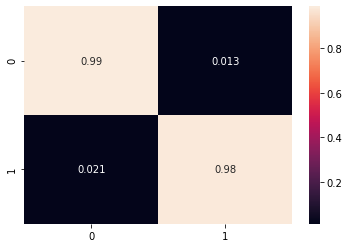

In [453]:
# confusion matrix
cm = confusion_matrix(y_test, y_predict)

# normalize the output of cm
cm_norms = cm / cm.sum(axis=1).reshape(-1,1)

# visualize confusion matrix
sns.heatmap(cm_norms, xticklabels=svc.classes_, yticklabels=svc.classes_, annot=True)
plt.show()

In [454]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
TN = cm[0, 0]

### Metrics computed from a confusion matrix

In [456]:
# Classification Accuracy: Overall, how often is the classifier correct?
print(((TP + TN) / (TP + TN + FP + FN)))

0.9826498422712934


In [457]:
# Classification Error: Overall, how often is the classifier wrong?
print(((FP + FN) / (TP + TN + FP + FN)))

0.017350157728706624


##### 1. Sensitivity: When the actual value is positive, how often is the prediction correct?

In [458]:
print((TP /  (FN + TP)))
print(recall_score(y_test, y_predict))

0.9792284866468842
0.9792284866468842


##### 2. Specificity: When the actual value is negative, how often is the prediction correct?

In [459]:
specificity = (TN / (TN + FP))
print(specificity)

0.9865319865319865


##### 3. False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [460]:
print((FP / (FP + TN)))
print(1 - specificity )

0.013468013468013467
0.013468013468013518


##### 4. Precision: When a positive value is predicted, how often is the prediction correct?

In [461]:
print((TP / (TP + FP)))
print(precision_score(y_test, y_predict))

0.9880239520958084
0.9880239520958084


In [462]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.5315457413249212

In [463]:
# calculate the percentage of zeros
1 - y_test.mean()

0.46845425867507884

#### Receiver Operating Characteristic (ROC) Curves¶

In [464]:
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, threshold = roc_curve(y_test, y_predict)

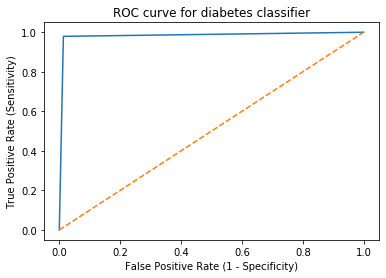

In [465]:
# plotting the roc graph
plt.plot(fpr, tpr)
plt.plot([0, 1], ls='--')
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## AUC
AUC is the percentage of the ROC plot that is underneath the curve:

In [317]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(roc_auc_score(y_test, y_predict))

0.9828802365894354


## Hyperparameter tunning

In [466]:
param_grid = {
    'C': [0.1, 1.5, 2, 2.5],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [468]:
grid_search = GridSearchCV(svc, param_grid,scoring='accuracy', cv=10)

In [354]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=2, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.5, 2, 2.5],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [355]:
# find the optimal parameter
print(grid_search.best_estimator_)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Model with best parameters

In [364]:
# initializing object
svc = SVC(C=1.5, gamma=0.1, kernel='rbf', probability=True)

# fit the training data
svc.fit(x_train, y_train)

# preidct with the test data
y2_predict_train = svc.predict(x_train)
y2_predict = svc.predict(x_test)

In [365]:
print('Training accuracy', accuracy_score(y_train, y2_predict_train))
print('Testing accuracy', accuracy_score(y_test, y2_predict))

Training accuracy 0.9913180741910024
Testing accuracy 0.9842271293375394


In [394]:
# probability score
predct_probs2 = svc.predict_proba(x_test)
predct_probs2

array([[9.89826800e-01, 1.01732004e-02],
       [1.91045340e-05, 9.99980895e-01],
       [5.06813585e-03, 9.94931864e-01],
       ...,
       [7.76823657e-01, 2.23176343e-01],
       [2.10052610e-06, 9.99997899e-01],
       [9.98525746e-01, 1.47425358e-03]])

In [377]:
# confusion matrix
cm = confusion_matrix(y_test, y2_predict)
cm2_norm = cm / cm.sum(axis=1)

cm2_norm

array([[0.98989899, 0.00890208],
       [0.02356902, 0.97922849]])

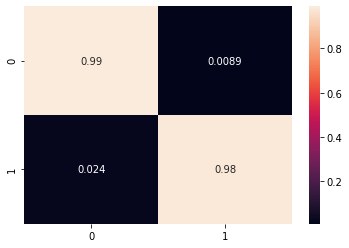

In [379]:
sns.heatmap(cm2_norm, xticklabels=svc.classes_, yticklabels=svc.classes_, annot=True)
plt.show()

In [475]:
roc_auc_score(y_test, y2_predict)

0.9845637382729371

In [469]:
fpr2, tpr2, threshold2 = roc_curve(y_test, y_predict)
auc_scores = auc(fpr2, tpr2)

In [479]:
# print accuracy , log loss and auc
print('Accuracy:', accuracy_score(y_test, y2_predict))
print('Log loss:', log_loss(y_test, predct_probs2))
print('AUC: ', auc(fpr2, tpr2))

Accuracy: 0.9842271293375394
Log loss: 0.056615041672399745
AUC:  0.9828802365894354


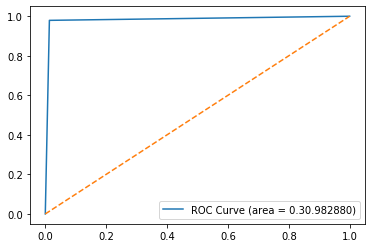

In [492]:
# plot roc auc curve

plt.plot(fpr2, tpr2, label = "ROC Curve (area = 0.3%f)" % auc(fpr2, tpr2))
plt.plot([0, 1], ls="--")
plt.legend()
plt.show()

## Cross validation score

In [499]:
corss_val = cross_val_score(svc, x,y, scoring = 'accuracy', cv=10)

print(corss_val)
print("Score: ",corss_val.mean())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]
Score:  0.9665325639899376
